In [8]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score
import re
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud


In [10]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [12]:
x_fake = pd.read_csv("Downloads/Fake.csv")
x_true = pd.read_csv ("Downloads/True.csv")

In [14]:
x_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [16]:
x_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [18]:
x_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [20]:
x_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [22]:
x_fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [24]:
x_true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [26]:
x_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [28]:
x_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [30]:
x_fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [34]:
x_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [36]:
x_fake.shape

(23481, 4)

In [38]:
x_true.shape

(21417, 4)

In [40]:
x_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [42]:
x_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [58]:
x_fake ['class']=0
x_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [60]:
x_true ['class']=1
x_true

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [62]:
merge_data = pd.concat ([x_fake, x_true], axis = 0)
merge_data

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [64]:
merge_data.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [68]:
df = merge_data.drop (['title', 'subject', 'date'], axis=1)
df

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [70]:
df = df.sample(frac=1)
df

,text,class
21218,MOSCOW (Reuters) - Russian Foreign Minister Se...,1
9413,WASHINGTON (Reuters) - A Congressional plan to...,1
9706,During a private meeting of the most senior Re...,0
21235,While some of the most important questions abo...,0
12118,,0
...,...,...
5721,It s no secret that people are furious over th...,0
13196,Trump supporters chanted at the press before a...,0
21110,Hillary was too busy to be bothered with makin...,0
23111,"This week, the momentum in Syria shifted dram...",0


In [72]:
df.reset_index (inplace = True)
df.drop (['index'], axis = 1, inplace = True)
df

,text,class
0,MOSCOW (Reuters) - Russian Foreign Minister Se...,1
1,WASHINGTON (Reuters) - A Congressional plan to...,1
2,During a private meeting of the most senior Re...,0
3,While some of the most important questions abo...,0
4,,0
...,...,...
44893,It s no secret that people are furious over th...,0
44894,Trump supporters chanted at the press before a...,0
44895,Hillary was too busy to be bothered with makin...,0
44896,"This week, the momentum in Syria shifted dram...",0


In [74]:
df.shape

(44898, 2)

In [78]:
df.describe()

,class
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [84]:
# Preprocessing Text Data: WORDOPT (it is a user defined module)
def wordopt (text):
    text=text.lower()
    text=re.sub(r'\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub(r'https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub(r'\w*\d\w*','',text)
    return text

In [83]:
df['text'] = df['text'].apply (wordopt)
df

,text,class
0,moscow reuters russian foreign minister se...,1
1,washington reuters a congressional plan to...,1
2,during a private meeting of the most senior re...,0
3,while some of the most important questions abo...,0
4,,0
...,...,...
44893,it s no secret that people are furious over th...,0
44894,trump supporters chanted at the press before a...,0
44895,hillary was too busy to be bothered with makin...,0
44896,this week the momentum in syria shifted dram...,0


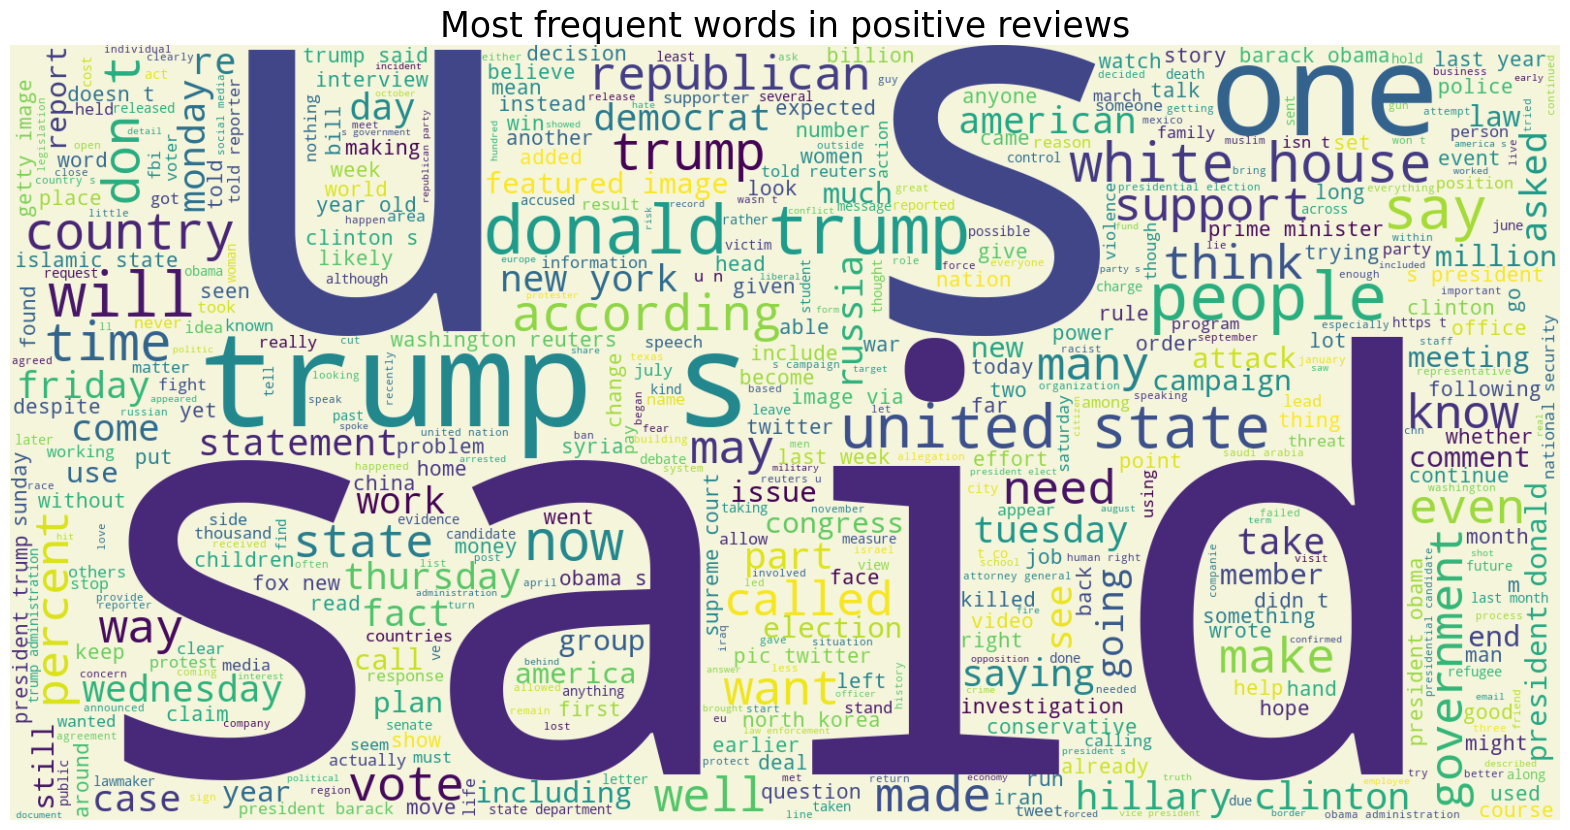

In [107]:
# Data Visualization:
text=' '.join([word for word in df['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800,background_color = 'beige').generate(text)
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=25)
plt.show()

In [109]:
# Data Splitting:
x = df ['text']
y = df ['class']
print (x)
print (y)

0        moscow  reuters    russian foreign minister se...
1        washington  reuters    a congressional plan to...
2        during a private meeting of the most senior re...
3        while some of the most important questions abo...
4                                                         
                               ...                        
44893    it s no secret that people are furious over th...
44894    trump supporters chanted at the press before a...
44895    hillary was too busy to be bothered with makin...
44896     this week  the momentum in syria shifted dram...
44897    san juan  puerto rico  reuters    a dam in pue...
Name: text, Length: 44898, dtype: object
0        1
1        1
2        0
3        0
4        0
        ..
44893    0
44894    0
44895    0
44896    0
44897    1
Name: class, Length: 44898, dtype: int64


In [113]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.25, random_state=42)
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(33673,) (11225,) (33673,) (11225,)


In [119]:
# NLP:
vector=TfidfVectorizer()
xv_train = vector.fit_transform (x_train)
xv_test = vector.transform (x_test)

In [120]:
xv_train

<33673x95158 sparse matrix of type '<class 'numpy.float64'>'
	with 6905672 stored elements in Compressed Sparse Row format>

In [123]:
xv_test

<11225x95158 sparse matrix of type '<class 'numpy.float64'>'
	with 2286005 stored elements in Compressed Sparse Row format>

In [125]:
xv_train.shape

(33673, 95158)

In [127]:
xv_test.shape

(11225, 95158)

In [129]:
# Model Building:
# 1. LogisticRegression
lr = LogisticRegression()
lr.fit(xv_train, y_train)

LogisticRegression()

In [131]:
pred_lr = lr.predict(xv_test)
pred_lr

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [133]:
accu_lr = lr.score(xv_test, y_test)
accu_lr

0.9858351893095768

In [135]:
# 2. Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(xv_train, y_train)

DecisionTreeClassifier()

In [136]:
pred_dtc = dtc.predict(xv_test)
pred_dtc

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [137]:
accu_dtc = accuracy_score(y_test, pred_dtc)
accu_dtc

0.9964365256124722

In [143]:
# 3. Random Forest Classifier
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [144]:
pred_rfc = rfc.predict(xv_test)
pred_rfc

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [147]:
accu_rfc = rfc.score (xv_test, y_test)
accu_rfc

0.9901113585746102

In [173]:
# CONCLUSION:
pd.set_option('display.max_colwidth', None)

In [175]:
x.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [177]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: class, dtype: int64

In [179]:
df[100:110]

text  \
100                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
# Sample Prediction: Index[2]
ex = ['''washington  reuters    a congressional plan to help puerto rico shed billions of dollars in bad debt can win enough support to make its way to a vote in the house of representatives  u s  lawmakers who support the measure said on tuesday  under the rescue plan  an independent panel would erase some of puerto rico s   billion debt load that has crippled the island state already facing a  percent poverty rate and the zika epidemic  u s  speaker of the house paul ryan  a republican  has endorsed the fix and the fate of the measure could help define his tenure as party leader which began in october  but ryan can rely on some democrats who say the rescue will aid the ailing island even if some of the legislation s provisions are too punitive of puerto rico   this is the only bill that will attract enough support from our colleagues on the republican side to pass in a congress they control   said rep  raul grijalva  the leading democrat on the house natural resources committee  grijalva of arizona said he expects lawmakers will ratify the plan when they write the fine print of the legislation at a hearing on wednesday  rep  rob bishop  the panel s chairman  postponed a law writing session in april because of opposition to the puerto rico rescue but on tuesday he said he was hopeful  ryan and democratic leaders stress the aid plan for the island means relief without federal spending though investors will see a cut in their puerto rican bond holdings and they are fighting for terms that could limit the hit to their portfolios  a leading voice for investors  the securities industry and financial markets association  sifma   on tuesday backed the plan which expects puerto rico to control deficit spending  a puerto rico oversight panel  or control board  could veto puerto rico spending measures that it finds irresponsible and sifma endorsed such  broad powers to enforce and monitor fiscal discipline   the oversight board would have the power to push creditors to accept a write down of debt  even over the objections of holdout investors  the plan would also ask the oversight board to protect the interests of puerto rico pensioners who rely on a system that is now under funded by at least   billion ''']
ex_vectorized = vector.transform (ex)
result = dtc.predict (ex_vectorized)
print (result)
if result ==0)
